In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import glob
#research on what these do
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
#used to plot 3D in matplotlib
from mpl_toolkits.mplot3d import Axes3D
matplotlib.use('TkAgg')

In [3]:
import process_skeleton as sk
import config_seamer as cf

In [4]:
#appending the path of the dataset
sys.path.append('SkeletonData/RawData/')


In [5]:
#Load the data
#using the sk and cf function to process the data and divide it into data,data_info,file_names
print("Path to data is ", cf.path_dataset)
data, data_info, file_names = sk.process_files(cf.path_dataset)

Path to data is  SkeletonData/RawData
Parsing files
Number of ignored files 12


In [6]:
data

[array([[-0.1028086 ,  0.06965441,  2.464606  , ...,  0.1245524 ,
         -0.02702154,  2.387     ],
        [-0.1034582 ,  0.0695429 ,  2.464585  , ...,  0.1172405 ,
         -0.00733298,  2.386263  ],
        [-0.103923  ,  0.06990241,  2.464467  , ...,  0.1263673 ,
         -0.0307005 ,  2.370857  ],
        ...,
        [-0.1143321 ,  0.0735339 ,  2.452708  , ...,  0.1980453 ,
          0.01001343,  2.322895  ],
        [-0.1140723 ,  0.07336931,  2.45262   , ...,  0.2055369 ,
         -0.01951867,  2.3535    ],
        [-0.1138534 ,  0.07327832,  2.452607  , ...,  0.2023027 ,
         -0.0273732 ,  2.3683    ]]),
 array([[-1.113103e-01,  7.357545e-02,  2.454638e+00, ...,  1.871319e-01,
         -1.066097e-03,  2.354778e+00],
        [-1.112978e-01,  7.353331e-02,  2.454597e+00, ...,  1.921935e-01,
          1.590838e-02,  2.322688e+00],
        [-1.114419e-01,  7.352883e-02,  2.454475e+00, ...,  1.912198e-01,
          4.898879e-02,  2.284960e+00],
        ...,
        [-1.151304

In [7]:
data_info

 ...]

In [8]:
file_names

['101_18_0_1_1_stand.txt',
 '101_18_0_2_1_stand.txt',
 '101_18_0_3_1_stand.txt',
 '101_18_0_4_1_stand.txt',
 '101_18_0_5_1_stand.txt',
 '101_18_0_6_1_chair.txt',
 '101_18_0_7_1_chair.txt',
 '101_18_0_8_1_chair.txt',
 '101_18_0_9_1_stand.txt',
 '101_18_1_10_1_chair.txt',
 '101_18_1_11_1_chair.txt',
 '101_18_1_12_1_chair.txt',
 '101_18_1_13_1_chair.txt',
 '101_18_1_1_1_stand.txt',
 '101_18_1_2_1_stand.txt',
 '101_18_1_3_1_stand.txt',
 '101_18_1_4_1_stand.txt',
 '101_18_1_5_1_stand.txt',
 '101_18_1_6_1_stand.txt',
 '101_18_1_7_1_stand.txt',
 '101_18_1_8_1_chair.txt',
 '101_18_1_9_1_chair.txt',
 '101_18_2_10_1_chair.txt',
 '101_18_2_11_1_chair.txt',
 '101_18_2_12_1_chair.txt',
 '101_18_2_1_1_stand.txt',
 '101_18_2_2_1_stand.txt',
 '101_18_2_3_1_stand.txt',
 '101_18_2_4_1_stand.txt',
 '101_18_2_5_1_stand.txt',
 '101_18_2_6_1_stand.txt',
 '101_18_2_7_1_chair.txt',
 '101_18_2_8_1_chair.txt',
 '101_18_2_9_1_chair.txt',
 '101_18_3_10_1_chair.txt',
 '101_18_3_11_1_chair.txt',
 '101_18_3_12_1_cha

In [9]:
number_examples = len(data)
print("Total number of considered gestures", len(data))


Total number of considered gestures 2577


In [10]:

distribution_data = sk.data_stats(data, data_info)

print(distribution_data)

Number correct 2047  with an average length of  68.43185148998535
Number incorrect 530  with an average length of  148.26415094339623
None


In [11]:
#creating an empty dictionary the information of the df
d = {'correctness': [True]* number_examples, 
     'date': np.zeros([number_examples]), 
     'gesture_type': [""]* number_examples, 
     'patient_id': [""]* number_examples, 
     'position': [""]* number_examples, 
     'repetition_number': np.zeros([number_examples]),
     'length': np.zeros([number_examples])
     }
#using a loop to run through the data and input the values to create a dataframe for visualization
for i in range(number_examples):
    d['correctness'][i] = (data_info[i].correct == "1")
    d['date'][i] = int(data_info[i].date)
    d['gesture_type'][i] = data_info[i].gesture_type
    d['patient_id'][i] = data_info[i].patient_id
    d['position'][i] = data_info[i].position
    d['repetition_number'][i] = data_info[i].repetition
    d['length'][i] = data[i].shape[0]
            
skeletion_data = pd.DataFrame(data=d)

In [12]:
skeletion_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577 entries, 0 to 2576
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   correctness        2577 non-null   bool   
 1   date               2577 non-null   float64
 2   gesture_type       2577 non-null   object 
 3   patient_id         2577 non-null   object 
 4   position           2577 non-null   object 
 5   repetition_number  2577 non-null   float64
 6   length             2577 non-null   float64
dtypes: bool(1), float64(3), object(3)
memory usage: 123.4+ KB


In [13]:
skeletion_data.head(30)

,correctness,date,gesture_type,patient_id,position,repetition_number,length
0,True,18.0,0,101,stand,1.0,59.0
1,True,18.0,0,101,stand,2.0,44.0
2,True,18.0,0,101,stand,3.0,53.0
3,True,18.0,0,101,stand,4.0,57.0
4,True,18.0,0,101,stand,5.0,60.0
5,True,18.0,0,101,chair,6.0,74.0
6,True,18.0,0,101,chair,7.0,64.0
7,True,18.0,0,101,chair,8.0,62.0
8,True,18.0,0,101,stand,9.0,69.0
9,True,18.0,1,101,chair,10.0,69.0


In [14]:
#I might rename the data to give more information from the data to change the patient_id to their categories,the gesture types to their own categories too for analysis

In [15]:
skeletion_data.to_csv('reformed.csv')

Basic information about the length of the sequences
count    2577.000000
mean       84.850601
std        86.911395
min        13.000000
25%        50.000000
50%        64.000000
75%        89.000000
max      1586.000000
Name: length, dtype: float64


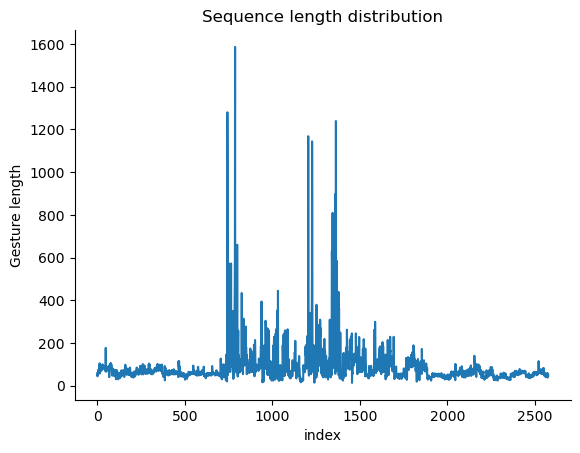

In [16]:
%matplotlib inline
print("Basic information about the length of the sequences")
print(skeletion_data['length'].describe())
# 
plt.plot(range(skeletion_data.shape[0]),(skeletion_data['length']))
plt.xlabel('index')
plt.ylabel('Gesture length')
plt.title("Sequence length distribution")
sns.despine()

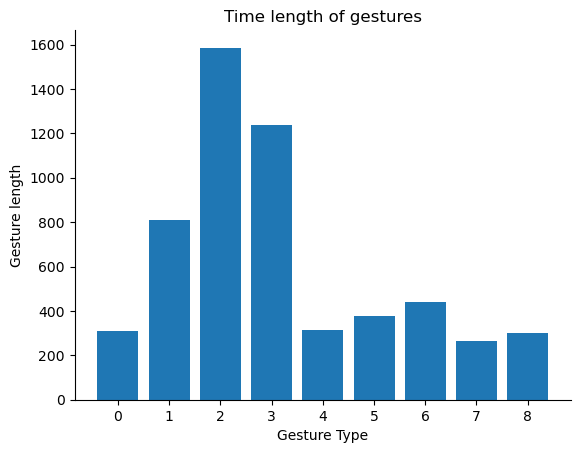

In [17]:
%matplotlib inline
# 
plt.bar(skeletion_data['gesture_type'], skeletion_data['length'])
plt.xlabel('Gesture Type')
plt.ylabel('Gesture length')
plt.title("Time length of gestures")
sns.despine()

In [18]:
plt.bar(skeletion_data['correctness'])
plt.xlabel('Gesture Type')
plt.ylabel('Gesture length')
plt.title("Time length of gestures")
sns.despine()

TypeError: bar() missing 1 required positional argument: 'height'

<AxesSubplot:xlabel='correctness', ylabel='length'>

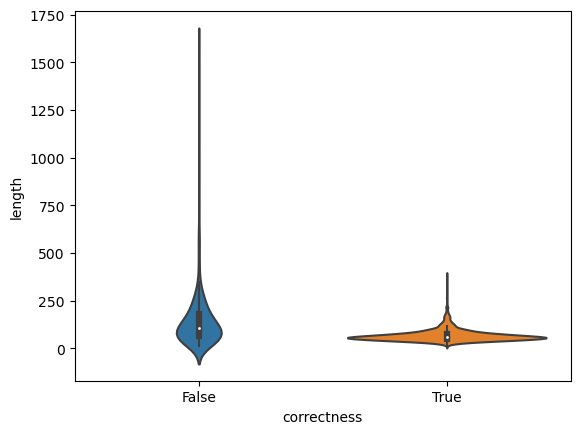

In [19]:
sns.violinplot(x="correctness",y="length",data=skeletion_data)

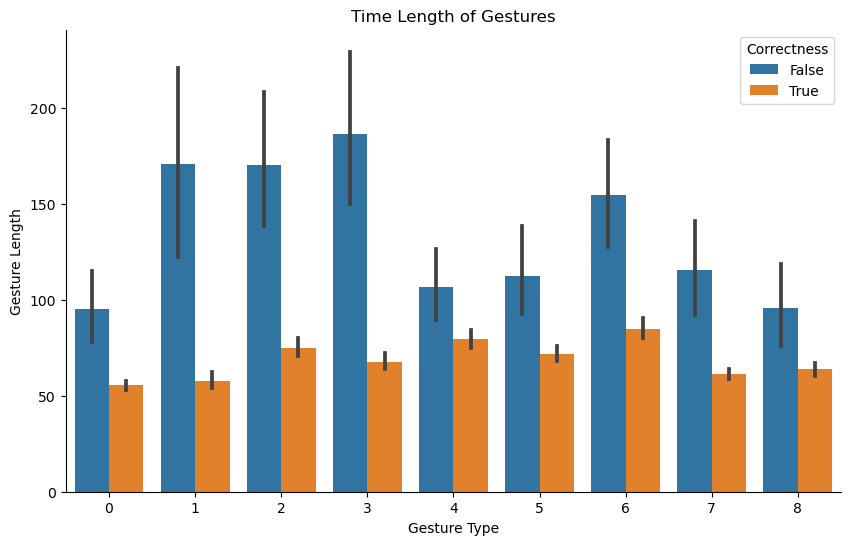

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x= 'gesture_type',y = 'length',hue='correctness',data= skeletion_data)
plt.xlabel('Gesture Type')
plt.ylabel('Gesture Length')
plt.title("Time Length of Gestures")
plt.legend(title='Correctness')
sns.despine()

plt.show()

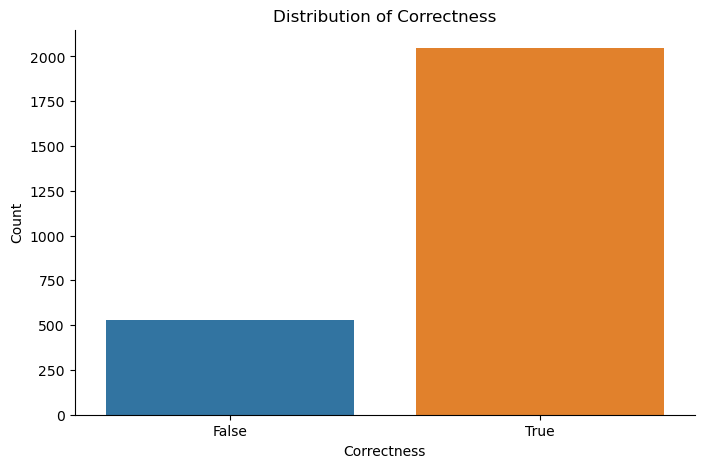

In [21]:
plt.figure(figsize=(8, 5))

# Use countplot to plot the distribution of 'correctness'
sns.countplot(x='correctness', data=skeletion_data)

plt.xlabel('Correctness')
plt.ylabel('Count')
plt.title("Distribution of Correctness")
sns.despine()

plt.show()

In [22]:
skeletion_data['Patient'] = skeletion_data['patient_id'].str.startswith('2')
print("================Healty================")
s_healty = pd.Series(skeletion_data[skeletion_data['Patient']==False]['position'])
print(len(s_healty))
print(s_healty.value_counts())
print(s_healty.value_counts()/len(s_healty))
print("================Patients===============")
s_patient = pd.Series(skeletion_data[skeletion_data['Patient']==True]['position'])
print(len(s_patient))
print(s_patient.value_counts())
print(s_patient.value_counts()/len(s_patient))

================Healty================
1406
stand    713
chair    583
sit      110
Name: position, dtype: int64
stand    0.507112
chair    0.414651
sit      0.078236
Name: position, dtype: float64
================Patients===============
1171
stand          502
wheelchair     359
chair          259
Stand-frame     51
Name: position, dtype: int64
stand          0.428693
wheelchair     0.306576
chair          0.221178
Stand-frame    0.043553
Name: position, dtype: float64


In [23]:
dist_healthy = s_healty.value_counts()


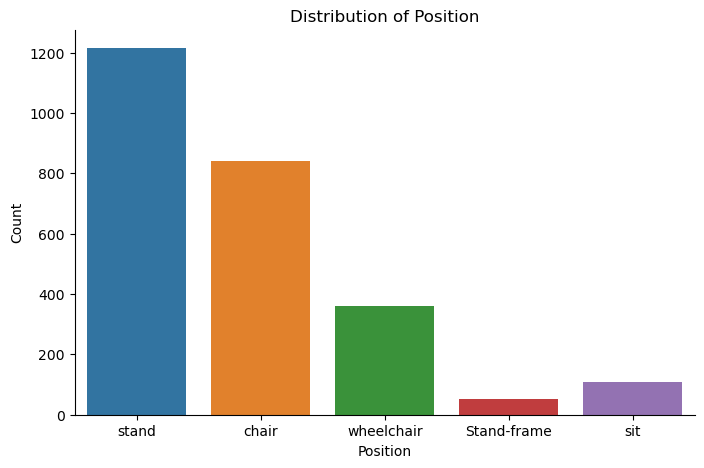

In [24]:
plt.figure(figsize=(8, 5))

# Use countplot to plot the distribution of 'correctness'
sns.countplot(x='position', data=skeletion_data)

plt.xlabel('Position')
plt.ylabel('Count')
plt.title("Distribution of Position")
sns.despine()

plt.show()

In [25]:
s_healty.head()

0    stand
1    stand
2    stand
3    stand
4    stand
Name: position, dtype: object

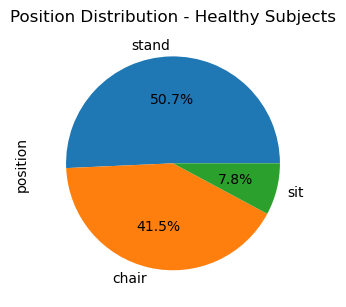

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization for Healty data
plt.figure(figsize=(12, 6))
# plt.subplot(2, 2, 1)
# sns.countplot(s_healty)
# plt.title('Position Distribution - Healthy Subjects')

plt.subplot(2, 2, 2)
s_healty.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Position Distribution - Healthy Subjects')



plt.tight_layout()
plt.show()


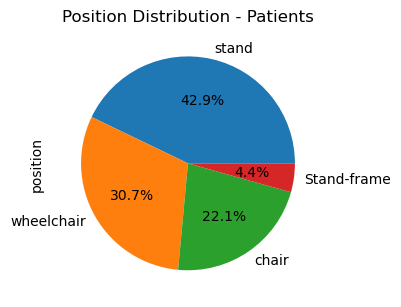

In [36]:
# Visualization for Patients data
# plt.figure(figsize=(12, 6))

# plt.subplot(2, 2, 3)
# sns.countplot(s_patient)
# plt.title('Position Distribution - Patients')
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 4)
s_patient.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Position Distribution - Patients')

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


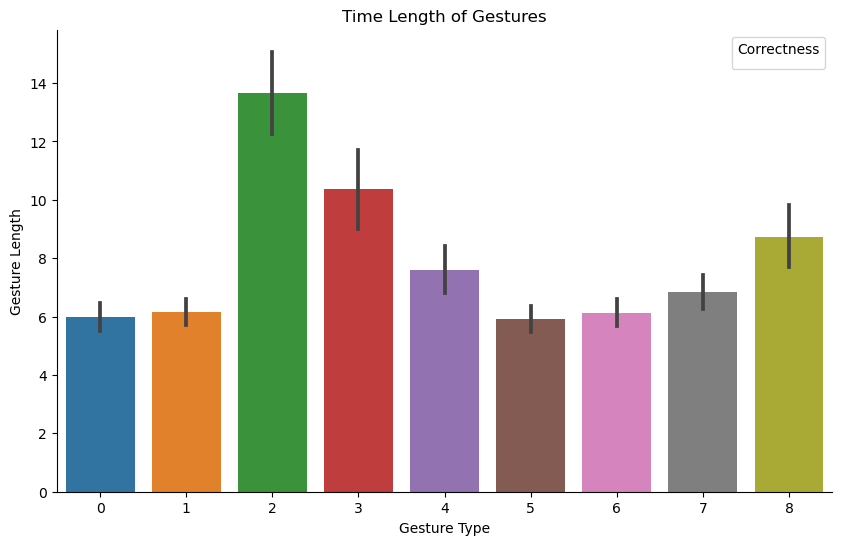

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(x= 'gesture_type',y = 'repetition_number',data= skeletion_data)
plt.xlabel('Gesture Type')
plt.ylabel('Gesture Length')
plt.title("Time Length of Gestures")
plt.legend(title='Correctness')
sns.despine()

plt.show()